In [2]:
import pandas as pd
df = pd.read_csv('kion10y.csv', encoding="utf-8")
df

,年,月,日,気温,品質,均質
0,2006,1,1,3.6,8,1
1,2006,1,2,4.0,8,1
2,2006,1,3,3.7,8,1
3,2006,1,4,4.0,8,1
4,2006,1,5,3.6,8,1
5,2006,1,6,2.1,8,1
6,2006,1,7,2.8,8,1
7,2006,1,8,4.2,8,1
8,2006,1,9,3.7,8,1
9,2006,1,10,4.3,8,1


In [12]:
# file:hekin.py
import pandas as pd

# PandasでCSVを読み込む ---(*1)
df = pd.read_csv("kion10y.csv", encoding="utf-8")

# 日付ごとに気温をリストにまとめる ---(*2)
md = {}
for i, row in df.iterrows():
    m,  d, v = (int(row['月']), int(row['日']), float(row['気温']))
    key = "{:02d}/{:02d}".format(m,d)
    if not(key in md): md[key] = []
    md[key] += [v]

# 日付ごとに平均を求める ---(*3)
avs = {}
for key in sorted(md):
    v = avs[key] = sum(md[key]) / len(md[key]) # ---(*4)
    print("{0} : {1}".format(key, v))

01/01 : 6.0
01/02 : 6.545454545454546
01/03 : 6.145454545454546
01/04 : 6.1
01/05 : 6.4818181818181815
01/06 : 6.663636363636363
01/07 : 6.290909090909091
01/08 : 6.718181818181818
01/09 : 6.6000000000000005
01/10 : 6.0636363636363635
01/11 : 5.972727272727272
01/12 : 5.045454545454546
01/13 : 5.427272727272728
01/14 : 5.090909090909092
01/15 : 5.4363636363636365
01/16 : 5.654545454545454
01/17 : 5.627272727272726
01/18 : 5.045454545454546
01/19 : 6.0636363636363635
01/20 : 5.6909090909090905
01/21 : 5.6
01/22 : 5.5636363636363635
01/23 : 5.890909090909091
01/24 : 5.4818181818181815
01/25 : 6.0
01/26 : 6.027272727272727
01/27 : 6.363636363636363
01/28 : 6.5
01/29 : 6.281818181818181
01/30 : 6.763636363636365
01/31 : 6.754545454545453
02/01 : 6.309090909090909
02/02 : 6.663636363636363
02/03 : 6.363636363636363
02/04 : 5.800000000000001
02/05 : 5.790909090909091
02/06 : 5.318181818181818
02/07 : 6.1909090909090905
02/08 : 5.645454545454545
02/09 : 5.754545454545455
02/10 : 6.62727272727

In [13]:
avs["11/03"]

15.48181818181818

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
# CSVを読み込む ---(*1)
df = pd.read_csv("kion10y.csv", encoding="utf-8")
# 月ごとに平均を求める ---(*2)
g = df.groupby(['月'])["気温"]
gg = g.sum() / g.count()
# 結果を出力 ---(*3)
print(gg)
gg.plot()
plt.savefig("tenki-heikin-tuki.png")
plt.show()

月
1      5.996481
2      6.598714
3     10.017009
4     14.481515
5     19.607918
6     22.544848
7     26.422287
8     27.887097
9     24.360303
10    19.155132
11    13.484545
12     8.653079
Name: 気温, dtype: float64


<Figure size 640x480 with 1 Axes>

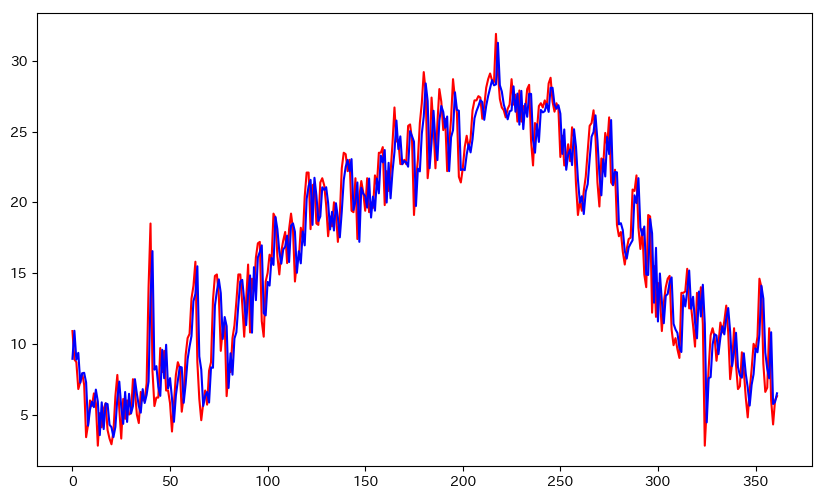

In [15]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('kion10y.csv', encoding="utf-8")

interval = 3
train_year = (df["年"] <= 2015)
test_year = (df["年"] >= 2016)

def make_data(data):
    x = []
    y = []
    temps = list(data["気温"])
    for i in range(len(temps)):
        if i <= interval: continue
        y.append(temps[i])
        xa = []
        for p in range(interval):
            d = i + p - interval
            xa.append(temps[d])
        x.append(xa)
    return (x, y)

train_x, train_y = make_data(df[train_year])
test_x, test_y = make_data(df[test_year])

# 機械学習を行う
lr = LinearRegression(normalize=True)
lr.fit(train_x, train_y) # 学習
pre_y = lr.predict(test_x) # 予測

# 結果を図にプロット
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(test_y, c='r')
plt.plot(pre_y, c='b')
plt.savefig('tenki-kion-lr.png')
plt.show()

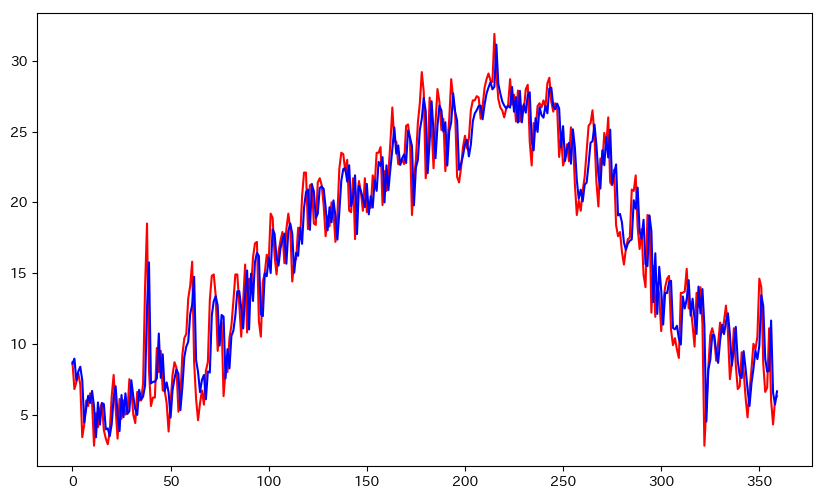

In [19]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 気温データ10年分の読み込み
df = pd.read_csv('kion10y.csv', encoding="utf-8")

# データを学習用とテスト用に分割する ---(*1)
train_year = (df["年"] <= 2015)
test_year = (df["年"] >= 2016)
interval = 6

# 過去6日分を学習するデータを作成 ---(*2)
def make_data(data):
    x = [] # 学習データ
    y = [] # 結果
    temps = list(data["気温"])
    for i in range(len(temps)):
        if i < interval: continue
        y.append(temps[i])
        xa = []
        for p in range(interval):
            d = i + p - interval
            xa.append(temps[d])
        x.append(xa)
    return (x, y)

train_x, train_y = make_data(df[train_year])
test_x, test_y = make_data(df[test_year])

# 直線回帰分析を行う ---(*3)
lr = LinearRegression(normalize=True)
lr.fit(train_x, train_y) # 学習
pre_y = lr.predict(test_x) # 予測

# 結果を図にプロット ---(*4)
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(test_y, c='r')
plt.plot(pre_y, c='b')
plt.savefig('tenki-kion-lr.png')
plt.show()



In [18]:
pre_y  - test_y

array([-1.95949652,  2.02098954,  0.17475934,  2.56149471, -0.05499924,
        0.01417619,  0.85095238,  3.86532092, -0.08645252, -0.64145346,
        0.31465049, -0.97951725,  0.96232148,  3.12090626, -1.5531638 ,
        1.76408225, -1.42787575, -0.0095096 ,  1.83854658,  0.9802277 ,
        1.20345178, -0.3962914 , -2.17222796, -1.65975765,  1.92760924,
        2.23819453, -1.75810863,  1.89527367, -1.52141224,  1.46599371,
       -0.02457291, -1.90153352,  0.79964095,  1.46980185,  1.20692232,
       -1.4682372 ,  0.79582555, -0.18498951, -0.80500627, -6.66987101,
       -5.2748041 ,  8.44845696,  2.56874349,  2.22066265,  0.76752106,
       -3.37999809,  1.57651103, -1.9338152 ,  3.23190234,  0.14024922,
        1.77328839,  2.34029795, -1.31630063, -1.45283016, -1.30179082,
        0.06870413,  3.13512794, -0.47048599, -2.04179113, -1.50864827,
       -0.90028915, -2.64933011, -1.09194837, -2.27475683,  6.77708921,
        3.00759863,  3.57403918, -0.19494982, -0.39825415,  0.89

In [25]:
diff_y = abs(pre_y  - test_y)
print("average=", sum(diff_y) / len(diff_y))
print("max=", max(diff_y))

average= 1.69354929762
max= 8.63204477439


月
1      5.996481
2      6.598714
3     10.017009
4     14.481515
5     19.607918
6     22.544848
7     26.422287
8     27.887097
9     24.360303
10    19.155132
11    13.484545
12     8.653079
Name: 気温, dtype: float64


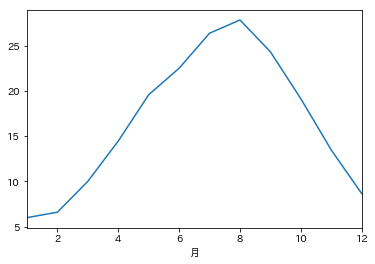

In [148]:
import matplotlib.pyplot as plt
import pandas as pd
# CSVを読み込む ---(*1)
df = pd.read_csv("kion10y.csv", encoding="utf-8")
# 月ごとに平均を求める ---(*2)
g = df.groupby(['月'])["気温"]
gg = g.sum() / g.count()
# 結果を出力 ---(*3)
print(gg)
gg.plot()
plt.savefig("tenki-heikin-tuki.png")


In [102]:
import pandas as pd

# PandasでCSVを読み込む
df = pd.read_csv("kion10y.csv", encoding="utf-8")

# 日付ごとに気温をリストにまとめる
md = {}
for i, row in df.iterrows():
    m,  d, v = (int(row['月']), int(row['日']), float(row['気温']))
    key = str(m) + "/" + str(d)
    if not(key in md): md[key] = []
    md[key] += [v]

# 日付ごとに平均を求める
avs = {}
for key in md:
    v = avs[key] = sum(md[key]) / len(md[key])
    print("{0} : {1}".format(key, v))



1/1 : 6.0
1/2 : 6.545454545454546
1/3 : 6.145454545454546
1/4 : 6.1
1/5 : 6.4818181818181815
1/6 : 6.663636363636363
1/7 : 6.290909090909091
1/8 : 6.718181818181818
1/9 : 6.6000000000000005
1/10 : 6.0636363636363635
1/11 : 5.972727272727272
1/12 : 5.045454545454546
1/13 : 5.427272727272728
1/14 : 5.090909090909092
1/15 : 5.4363636363636365
1/16 : 5.654545454545454
1/17 : 5.627272727272726
1/18 : 5.045454545454546
1/19 : 6.0636363636363635
1/20 : 5.6909090909090905
1/21 : 5.6
1/22 : 5.5636363636363635
1/23 : 5.890909090909091
1/24 : 5.4818181818181815
1/25 : 6.0
1/26 : 6.027272727272727
1/27 : 6.363636363636363
1/28 : 6.5
1/29 : 6.281818181818181
1/30 : 6.763636363636365
1/31 : 6.754545454545453
2/1 : 6.309090909090909
2/2 : 6.663636363636363
2/3 : 6.363636363636363
2/4 : 5.800000000000001
2/5 : 5.790909090909091
2/6 : 5.318181818181818
2/7 : 6.1909090909090905
2/8 : 5.645454545454545
2/9 : 5.754545454545455
2/10 : 6.627272727272726
2/11 : 5.618181818181818
2/12 : 5.690909090909091
2/13

In [57]:
g = df.groupby(['月'])["気温"]
g.sum() / g.count()

月
1      5.996481
2      6.598714
3     10.017009
4     14.481515
5     19.607918
6     22.544848
7     26.422287
8     27.887097
9     24.360303
10    19.155132
11    13.484545
12     8.653079
Name: 気温, dtype: float64

月
1      5.996481
2      6.598714
3     10.017009
4     14.481515
5     19.607918
6     22.544848
7     26.422287
8     27.887097
9     24.360303
10    19.155132
11    13.484545
12     8.653079
Name: 気温, dtype: float64


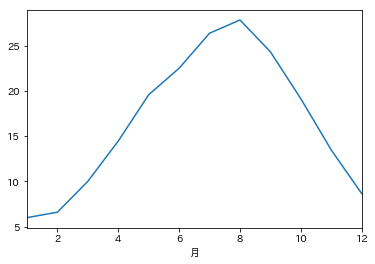

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
# CSVを読み込む --- (*1)
df = pd.read_csv("kion10y.csv", encoding="utf-8")
# 月ごとに平均を求める --- (*2)
g = df.groupby(['月'])["気温"]
gg = g.sum() / g.count()
# 結果を出力 --- (*3)
print(gg)
gg.plot()
plt.savefig("")

年
2006     2
2007    11
2008     5
2010    21
2011     9
2012     8
2013    16
2014    12
2015     7
2016     1
Name: 年, dtype: int64


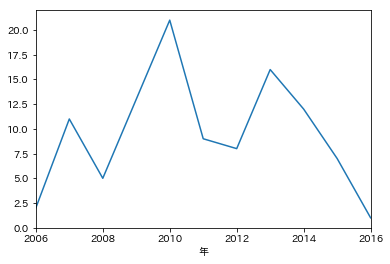

In [56]:
import pandas as pd
df = pd.read_csv('kion10y.csv', encoding="utf-8")
atui = (df["気温"] > 30)
cnt = df[atui].groupby(["年"])["年"].count()
print(cnt)
cnt.plot()